In [4]:
import polars as pl
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [5]:
# we are going to import some numpy arrays and try to d o some operations o nthem. We can treat the mas vectors

np.linspace(0,10,11)
x = np.array([0,2,1,0,4,0,6,10,8])
y = np.array([1,5,2,0,4,2,1,0,8])

In [6]:
x.dot(y)

98

In [7]:
# we can perfrom the dot product on those items 

np.dot(x,y)  

# Prodotto righe per colonne , date 2 matrici A[m*n]   e B [n*r] the number of columns of the first matrix hast to be the same as the number of rows of the second 
# in this case the operation will only works if n = n 'correct' , the result will be a matrix C[m,r]

98

In [8]:
A = np.array([1,2,2,2,3,3]).reshape(2,3) # A[2x3]
B = np.array([1,1,1]).reshape(3,1)  # B[3x1]

C = np.dot(A,B) # The resultant matric C[2x1]
np.shape(C)

(2, 1)

 The length of a vector is the Square root of the sum of the squares. It is basically the pitahoras theorem in multi-dimensions

$\ len(v) = (a_1^2+a_2^2+......+a_n^2)^{0.5} $
 
 where $\ v = [a_1,a_2,......a_n] $

In [9]:
# let's calculate the length of a vector, not the length of the array but the actual Modulus of the vector

def len_v(vector):
    return np.sqrt(np.dot(vector,vector))

In [10]:
# so the len of a vectro is alvays a scalar value
len_v(x)

14.866068747318506

In [11]:
mnist_dataset = genfromtxt('https://media.githubusercontent.com/media/jakub-braja/Podstawy-uczenia-maszynowego/667a1ac9ba301124aca8a8b4f11bf4bc098ebcc4/MNIST/mnist_test.csv', delimiter=',')

# Instead of removing everytime the last element of the array i can directly remove the last column of the mnist_dataset
mnist_dataset = mnist_dataset[:,1:]


In [12]:
tensor_1 = mnist_dataset[2]
tensor_2 = mnist_dataset[5]

tensor_1

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  38., 254., 109.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

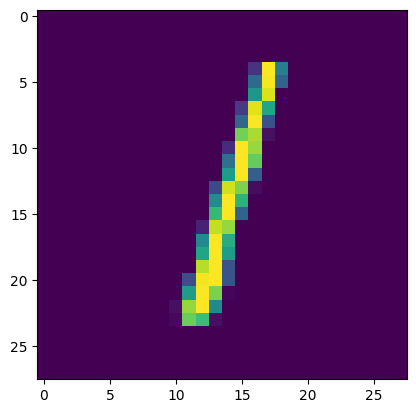

In [13]:
# we just plotted the image 

plt.imshow(tensor_1.reshape(28,28), cmap = None)

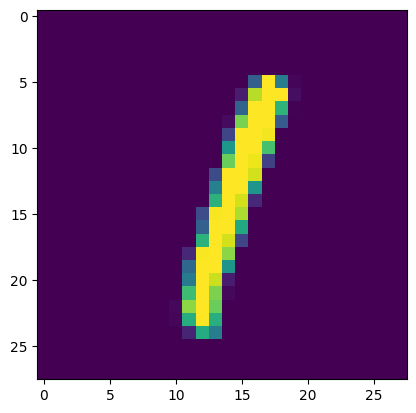

In [14]:
# we just plotted the image 

plt.imshow(tensor_2.reshape(28,28), cmap = None)

The Two images are similar so there should be a similarity if we perform an operation on the vectors as well

In [15]:
# Let's define the cosinus function between two vectros so we can understand if there is a correlation between images and the value of the cosinus between the vectors

def cos_ten(tensor_1,tensor_2):
    return tensor_1.dot(tensor_2)/ (np.sqrt(tensor_1.dot(tensor_1))*np.sqrt(tensor_2.dot(tensor_2))) #cosinus theta

In [16]:
# once defined the cosinus we can apply it to our mnist arrays to see the values of te cosinus

for i in range(100):
    if cos_ten(mnist_dataset[2], mnist_dataset[i]) > 0.7:
        print(f'Cos between [2] and [{i}] = {cos_ten(mnist_dataset[2], mnist_dataset[i])}')
    

# as we can see the result are close to what we would expect, in fact [2] it's similar to itself (cos = 1) and it is similar to [5] as the cos equals 0.89

Cos between [2] and [2] = 0.9999999999999999
Cos between [2] and [5] = 0.8958546444814048
Cos between [2] and [57] = 0.8815117447499261
Cos between [2] and [89] = 0.8488079124244385


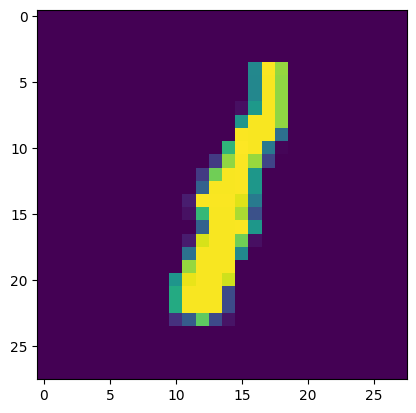

In [17]:
plt.imshow(mnist_dataset[89].reshape(28,28))

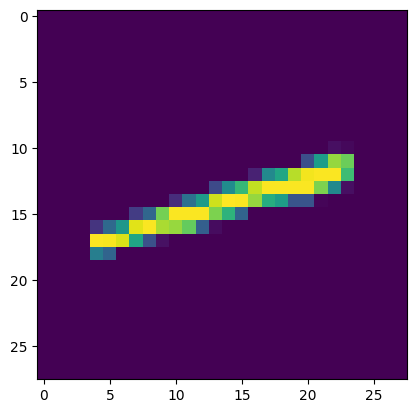

In [18]:
# Transpising means swapping rows and columns and hte effect of this is a symmetry along the x = y axis

plt.imshow(tensor_1.reshape(28,28).transpose())

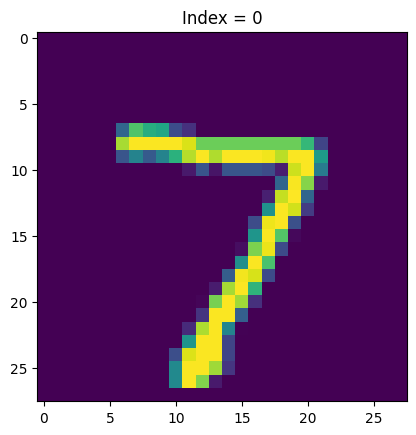

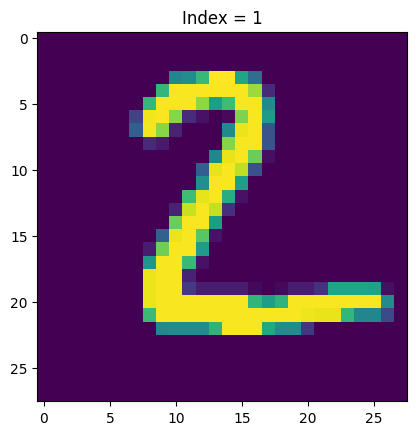

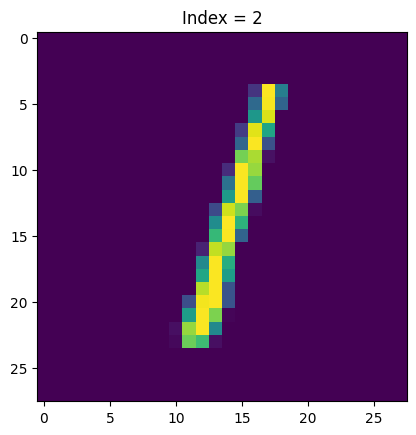

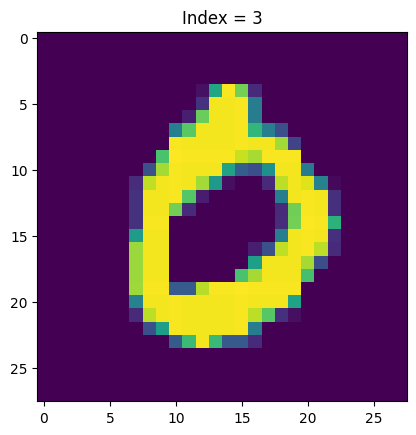

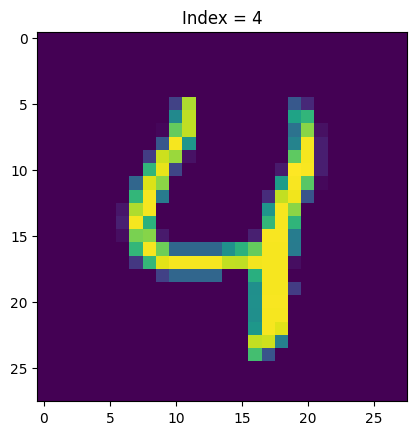

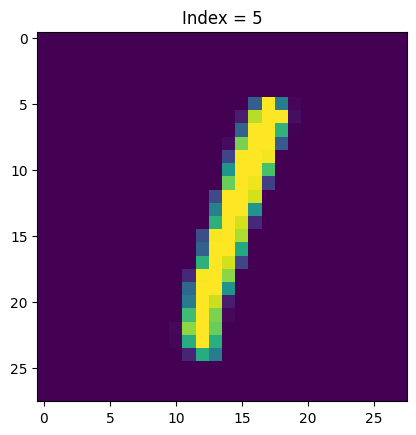

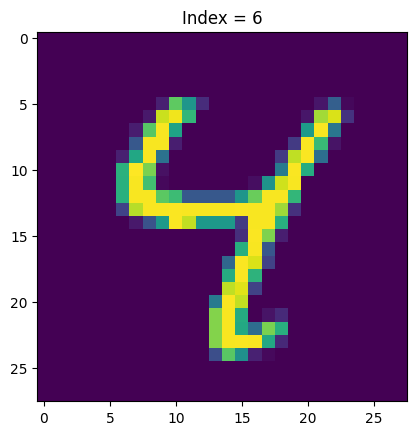

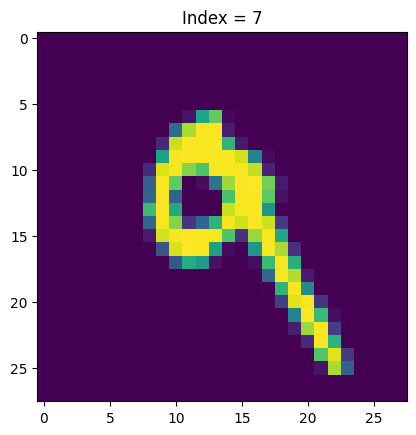

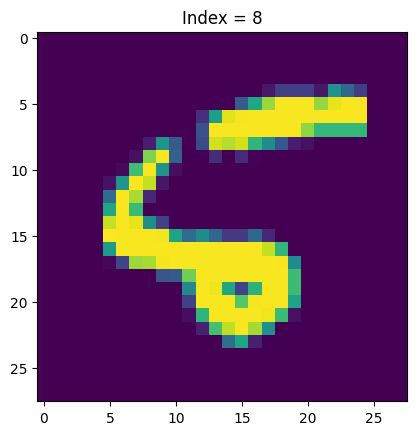

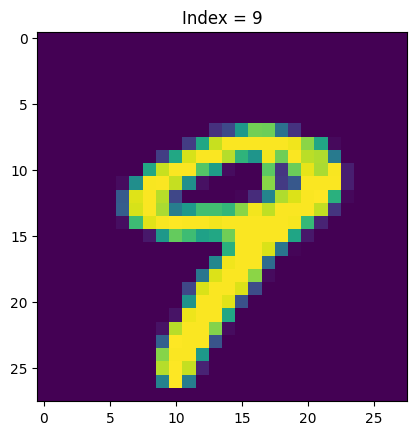

In [19]:
for i in range(10):
    
    plt.imshow(mnist_dataset[i].reshape(28,28))
    plt.title(f'Index = {i}')
    plt.show()

In [20]:
# now we are importing the scipy library

from scipy.optimize import minimize 

# here we are defining the function that we want to minimize, in thi case is just the dot product of the vectrox and another vector

def objective_function(x , vector):
    return -x.dot(vector)

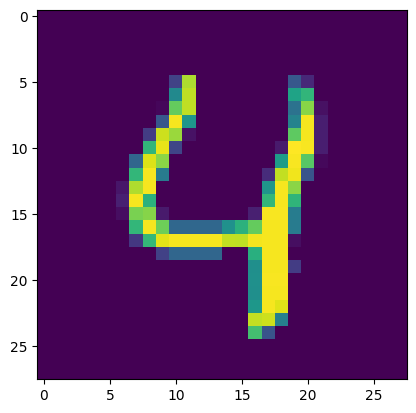

In [21]:
tensor_index_8 = mnist_dataset[4]   

# Our function will be avaluating the dot product btween a random vectro and a mnist image that we choose   f = x * mnist_image, the objective is to minimize the f so find the min(f(x))
result = minimize(
    objective_function,   # here we are just saying what is the function that we would like to find the min
    x0 = 255 * np.random.random(784),   # Here we are just generating a random vector that contains values between 0 and 255 and has a length of 784
    args = (tensor_index_8,)    # here we are just assigning the mnist_image to the function f ----> f = x * tensor_index_8
) 

plt.imshow(result.x.reshape(28,28))       # here from the result 'recap' we want to retrive the 'x' (THE SOLUTION), once we get that we reshape that and plot to see how it looks like

In [22]:
print(result)

-tensor_index_8.dot(result.x)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -564329322862.1697
        x: [ 1.358e+02  2.347e+02 ...  4.350e+01  1.228e+02]
      nit: 2
      jac: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
 hess_inv: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
            ...
            [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]]
     nfev: 12560
     njev: 16


-564329322862.1697

In [23]:
#WE can do teh same thing but now maximizing the Dot product to see what it will look like 
def objective_max(x , vector):
    return x.dot(vector)

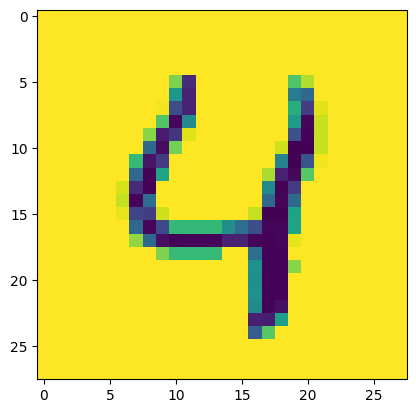

In [24]:
tensor_index_8 = mnist_dataset[4]   

# Our function will be avaluating the dot product btween a random vectro and a mnist image that we choose   f = x * mnist_image, the objective is to MAXIMIZE the f so find the max(f(x))
result = minimize(
    objective_max,   # here we are just saying what is the function that we would like to find the min
    x0 = 255 * np.random.random(784),   # Here we are just generating a random vector that contains values between 0 and 255 and has a length of 784
    args = (tensor_index_8,)    # here we are just assigning the mnist_image to the function f ----> f = x * tensor_index_8
) 

plt.imshow(result.x.reshape(28,28))       # here from the result 'recap' we want to retrive the 'x' (THE SOLUTION), once we get that we reshape that and plot to see how it looks like

# Zadania

In [25]:
# 0 
vec_8 = mnist_dataset[8]
vec_9 = mnist_dataset[9]

In [26]:
len_8 = len(vec_8)
len_9 = len(vec_9)

print(f'Len_8 = {len_8} \nLen_9 = {len_9}')

Len_8 = 784 
Len_9 = 784


In [27]:
cos_ten(vec_8,vec_9)

0.3530246155895931

In [28]:
ten_8 = vec_8.reshape(28,28)
ten_9 = vec_9.reshape(28,28)

tensors = [ten_8, ten_9]

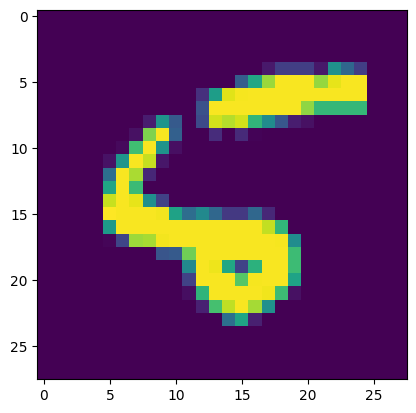

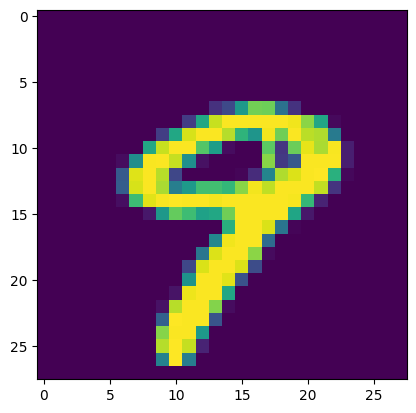

In [29]:
for item in tensors:
    plt.imshow(item)
    plt.show()

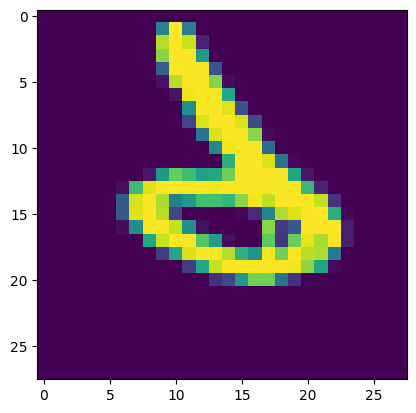

In [30]:
# we just mirrored the matrix arond the X axis

ten_9_x_rev = ten_9[::-1,:]

plt.imshow(ten_9_x_rev)

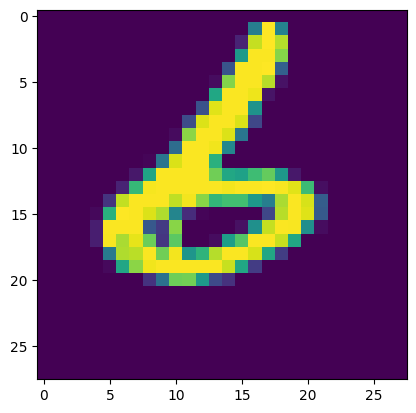

In [31]:
ten_9_rev = ten_9[::-1,::-1]

plt.imshow(ten_9_rev)

In [32]:
#Basically i reverted the ten_9 to make it look like a 6 and than compared it to vec_8 that is a 6 
vec_9_rev = ten_9_rev.reshape(784,) # i had to reshape the tensor to make it a vector in order to perform the dot product

# the result is the cosinus , but it is quite low, just 0.41 so actually those two are not so similar. At least usin the cos as a measure
cos_ten(vec_8, vec_9_rev)

0.41055606351394075

For numpy it is important the shape of the object
(784,) is not the same as (1,784) if no second index is specified like the "1" in this case ("1",784) for numpy it will always be a vector 
meaning that even thugh that vector theoretically has the same shapeas the matix still no operation between th two can be perofrmed. 

On the other hand if both shapes are specified it meanswe are working with matrices

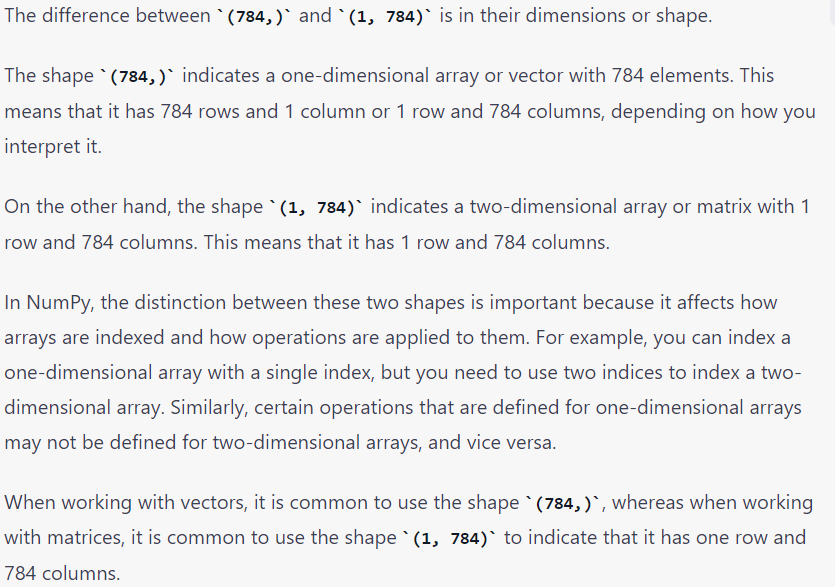

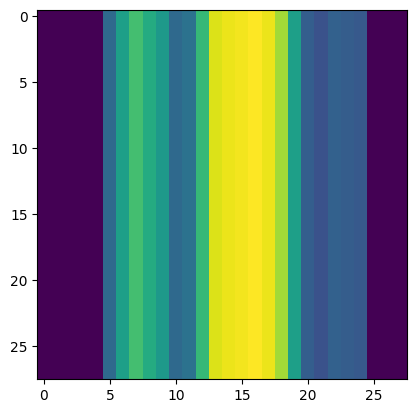

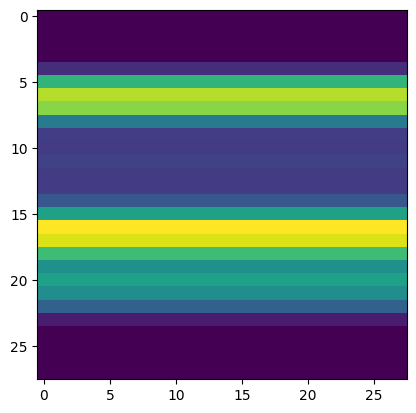

In [33]:
# We just have to create a matrix of all ones 
ten_ones = np.ones((28,28))

ten_ones_8 = np.dot(ten_ones, ten_8)
ten_8_ones = np.dot(ten_8, ten_ones)

dot_prod = [ten_ones_8, ten_8_ones]

for item in dot_prod:
    plt.imshow(item)
    plt.show()

# Note that the dot product is not commutative meaning that A*B is not the same as B*A at leat for matricesc

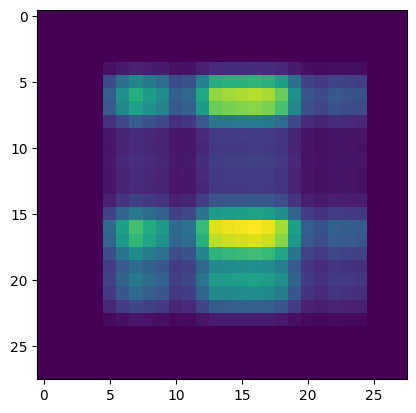

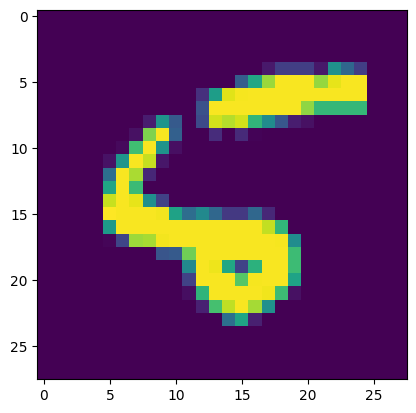

In [34]:
# We just have to create a matrix of all ones 
ten_ones = np.ones((28,28))

ten_ones_8 = np.dot(ten_ones, ten_8)
ten_8_ones = np.dot(ten_8, ten_ones)

ten_square = ten_8_ones * ten_ones_8

plt.imshow(ten_square)
plt.show()
plt.imshow(ten_8)
plt.show()

# Note that the dot product is not commutative meaning that A*B is not the same as B*A at leat for matricesc

If you notice the two vectors optained by the moltiplication with the "ones" matrix give you a band graph.
The two graphs can be interpreted as the bands where at least one value is non-zero. If you multiply those graphs together you get waht is supposed to be an area where 
just the part that contain something are colored

Now that you have that square you just have to put all the non zero values to 255, or do the opposite.

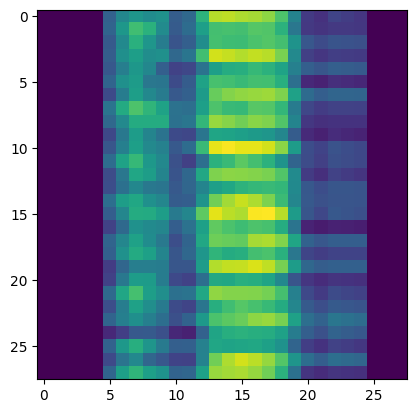

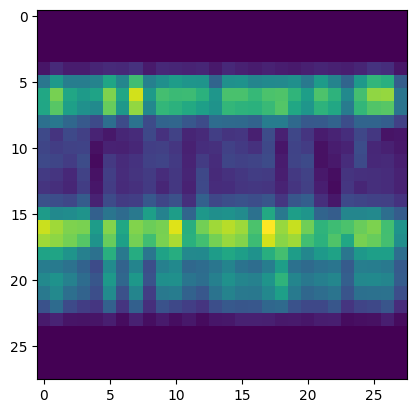

In [35]:
# We just have to create a matrix of all ones 
ten_random = np.random.random((28,28))

ten_8_random = np.dot(ten_8, ten_random)
ten_random_8 = np.dot(ten_random, ten_8)

dot_prod_2 = [ten_random_8, ten_8_random]

for item in dot_prod_2:
    plt.imshow(item)
    plt.show()

# Note that the dot product is not commutative meaning that A*B is not the same as B*A at leat for matricesc

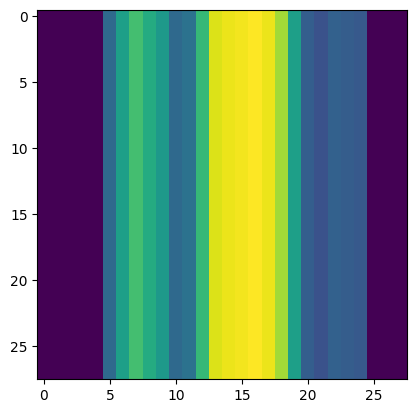

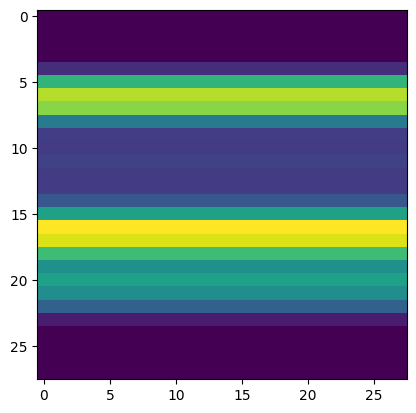

In [36]:
# We just have to create a matrix of all ones 
ten_ones = np.ones((28,28))

ten_ones_8 = np.dot(ten_ones, ten_8)
ten_8_ones = np.dot(ten_8, ten_ones)

dot_prod = [ten_ones_8, ten_8_ones]

for item in dot_prod:
    plt.imshow(item)
    plt.show()

# Note that the dot product is not commutative meaning that A*B is not the same as B*A at leat for matricesc

In [37]:
vec_8_trans = vec_8.transpose()

cos_ten(vec_8, vec_8_trans)

0.9999999999999999

In [38]:
vec_8_neg = 255 - vec_8

cos_ten(vec_8, vec_8_neg)

0.06124051143959192

# Zadania z minimalizacja funkcji

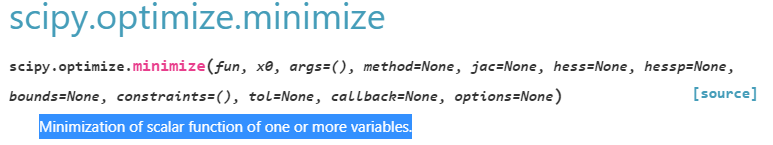
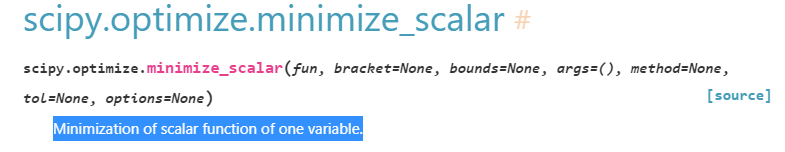

Text(0, 0.5, 'y - function')

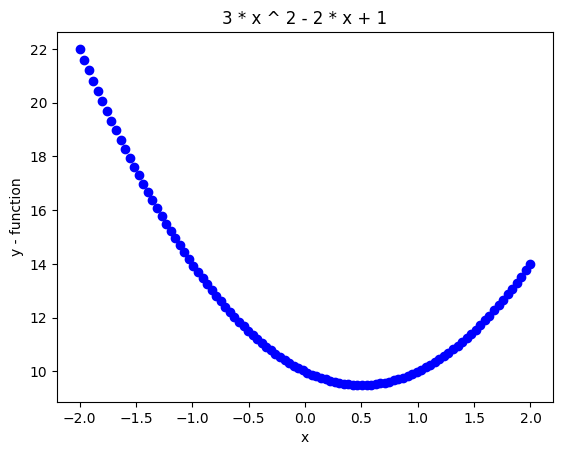

In [39]:
from scipy.optimize import minimize_scalar

def f_p(x):
    return 2 * x **2 - 2 * x + 10 

x = np.linspace(-2,2,100)

plt.plot(x, f_p(x), 'bo')
plt.title('3 * x ^ 2 - 2 * x + 1')
plt.xlabel('x')
plt.ylabel('y - function')

A short list of the most used command in matplotlib

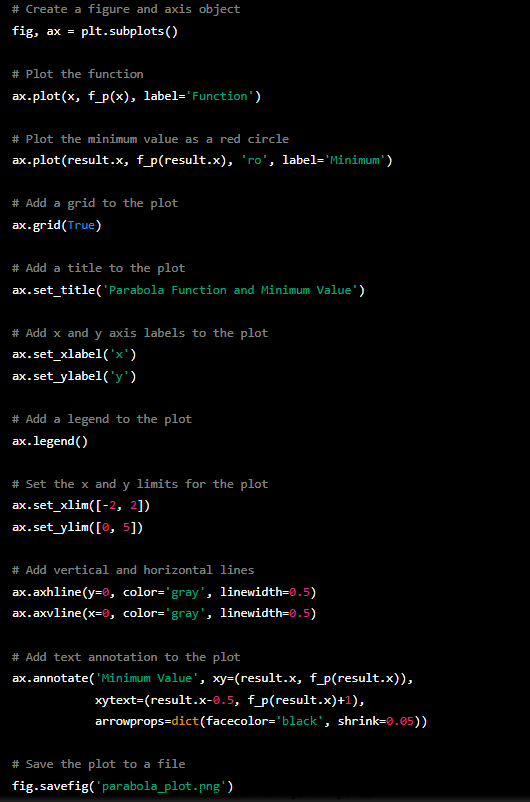

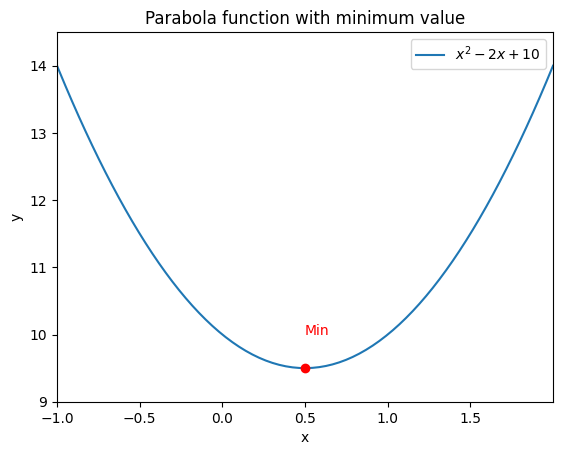

In [40]:
# we can do it using both minimize and minimize scalar.The first is used when 
#we do have multidimensional problems the latter just when we have a 1d problem


#result = minimize_scalar(f_p, bounds = (-2,2), method = 'bounded')  
result = minimize(f_p, x0 = 50) 

x = np.linspace(-2,2,100)   # i am giving the x intervals to the funciotn and generating the points

fig, ax = plt.subplots()  # We create the 

ax.plot(x, f_p(x), label = r'$x^2-2x+10$')
ax.plot(result.x,f_p(result.x), 'ro')
ax.set_title('Parabola function with minimum value')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.annotate('Min', xy = (result.x,f_p(result.x) + 0.5), color = 'red')
ax.set_ybound(f_p(result.x) + 5, f_p(result.x) - 0.5)
ax.set_xbound(result.x + 1.5, result.x - 1.5)
# ax.grid()
ax.legend()

## A List of commonly used figure methods

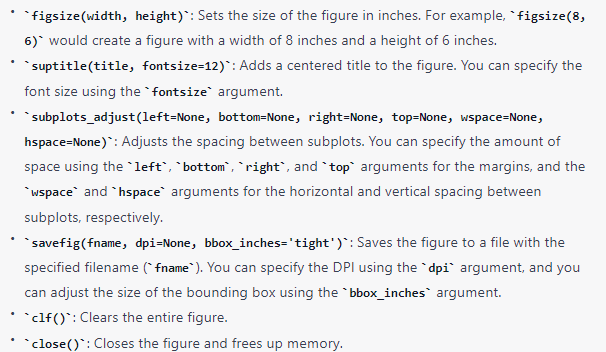

## A List of commonly used axis methods
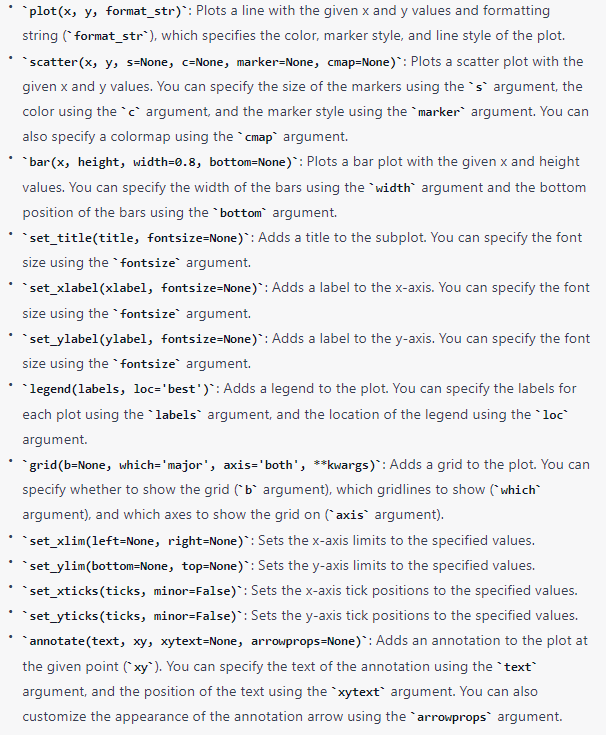

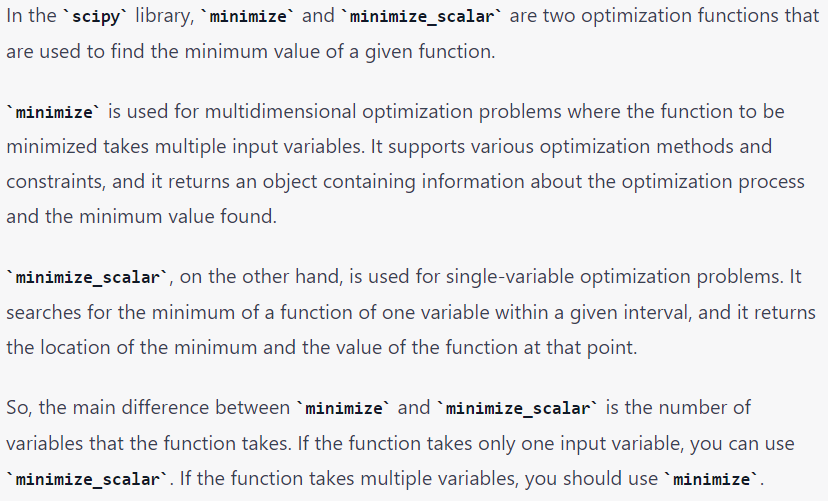

 message: Solution found.
 success: True
  status: 0
     fun: -1.0
       x: 1.887379141862766e-14
     nit: 6
    nfev: 6


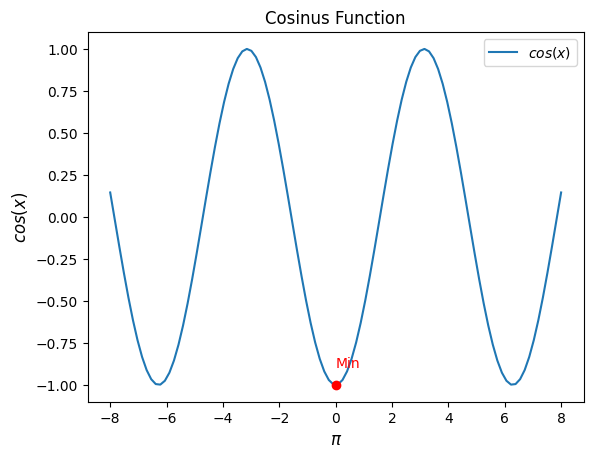

In [46]:
# find the min of the function r'$ np.cos(x) $'

# We are defining the x values we are going to use 

x  = np.linspace(-8,8,100) 

#We define the cos function as the np.cos function

def f_cos(x):
    return -np.cos(x)

# We use the minimize library to find out what is the minimum of the function

res = minimize_scalar(f_cos, bounds=(-8,8), method = 'bounded')
# res = minimize(f_cos, x0 = [-3,0,3])

fig, ax = plt.subplots()

ax.plot(x, f_cos(x), label = r'$cos(x)$')
ax.plot(res.x, f_cos(res.x), 'ro')
ax.set_title('Cosinus Function')
ax.set_xlabel('$\pi$',  fontsize = 12, fontweight = 'bold')
ax.set_ylabel('$cos(x)$', fontsize = 12, fontweight = 'bold')
ax.annotate('Min', xy = (res.x,f_cos(res.x) + 0.1), color = 'red')
# ax.set_ybound(f_cos(result.x) + 5, f_cos(result.x) - 0.5)
# ax.set_xbound(result.x + 1.5, result.x - 1.5)
# ax.grid()
ax.legend()

print(res)



  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.0602713298157265
        x: [ 7.012e+00]
      nit: 3
      jac: [-5.960e-08]
 hess_inv: [[ 8.295e-02]]
     nfev: 10
     njev: 5
[-5.554366716366284, -5.554366723543718, -6.52498269804822, -6.524982715120269, -11.837552032218234, -6.524982713082434, -2.2920394346855804, -1.227299352534462, -0.2417970530479745, -0.2417974062066094, -0.24179740529898858, -2.2920393071517817, 3.991145515026081, 5.055886298347571, 6.041387873300401, 7.012003885163389]


16

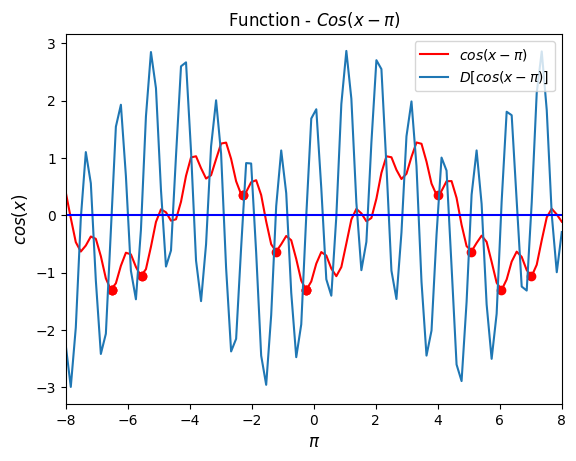

In [73]:
def f_cos_pi(x):
    return np.cos(x - np.pi)+ (np.sin(6 * x)/3)


def f_cos_pi_derivative(x):
    return -np.sin(x - np.pi) + 2 * np.cos(6 * x)

x  = np.linspace(-8,8,100) 

fig, ax = plt.subplots()

initial_guesses = np.arange(-8,8,1)

# set up an empty list to store the local minimums
local_minimums = []

# iterate over the initial guesses
for guess in initial_guesses:
    # minimize the function with the current guess
    res = minimize(f_cos_pi, x0=guess)
    # add the minimum to the list
    local_minimums.append(res.x[0])

    ax.plot(res.x, f_cos_pi(res.x[0]), 'ro')
    # ax.annotate('Loc min', xy = (res.x,f_cos_pi(res.x[0]) + 0.1), color = 'red')

y= np.zeros_like(x)
ax.plot(x, f_cos_pi(x), label = r'$cos(x-\pi)$', color = 'r')
ax.plot(x, f_cos_pi_derivative(x), label = r'$D[cos(x-\pi)]$' )
ax.plot(x, y, color = 'b')
ax.set_title('Function - $Cos(x-\pi)$')
ax.set_xlabel('$\pi$',  fontsize = 12, fontweight = 'bold')
ax.set_ylabel('$cos(x)$', fontsize = 12, fontweight = 'bold')
# ax.set_ybound(f_cos(result.x) + 5, f_cos(result.x) - 0.5)
ax.set_xbound(-8, 8)
# ax.grid()
ax.legend()

print(res)
print(local_minimums)
len(local_minimums)

Where the derivative hits "0" there we have a Min or Maximum, we can than take all the zeros
To  check if thet were max or min we should use another derivative 

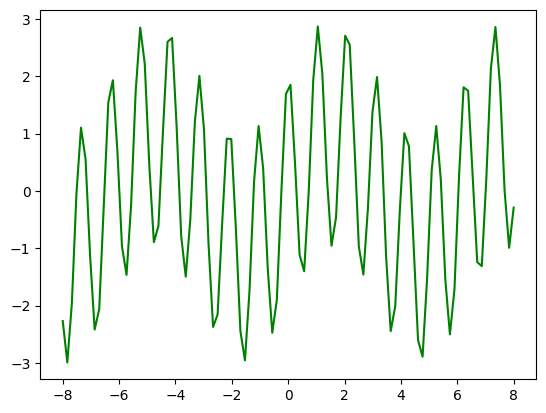

In [60]:
fig, ax = plt.subplots()
ax.plot(x, f_cos_pi_derivative(x), label = r'$cos(x-\pi)$', color = 'g')